# Do basal and non-basal breast cancer samples naturally separate based on global gene expression patterns?

In [16]:
import pandas as pd

df = pd.read_csv("breastcancer.csv", index_col=0)
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [15]:
labels = []
for col in df.columns:
    if "Basal" in col:
        labels.append("Basal")
    else:
        labels.append("Non-Basal")


In [3]:
X = df.T


In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

labels = X.loc['type']

X_features_rows = X.drop('type', axis=0)

X_features_rows = X_features_rows.apply(pd.to_numeric, errors='coerce')

X_for_scaler = X_features_rows.T

X_scaled = StandardScaler().fit_transform(X_for_scaler)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    pcs,
    columns=["PC1", "PC2"]
)

pca_df["Subtype"] = labels


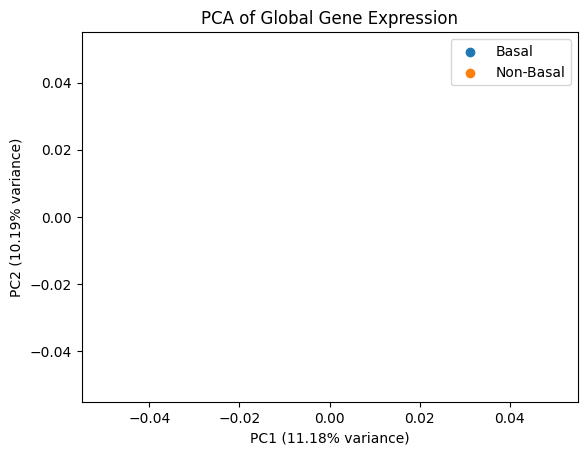

In [6]:
import matplotlib.pyplot as plt

for subtype in ["Basal", "Non-Basal"]:
    subset = pca_df[pca_df["Subtype"] == subtype]
    plt.scatter(subset["PC1"], subset["PC2"], label=subtype)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend()
plt.title("PCA of Global Gene Expression")
plt.show()


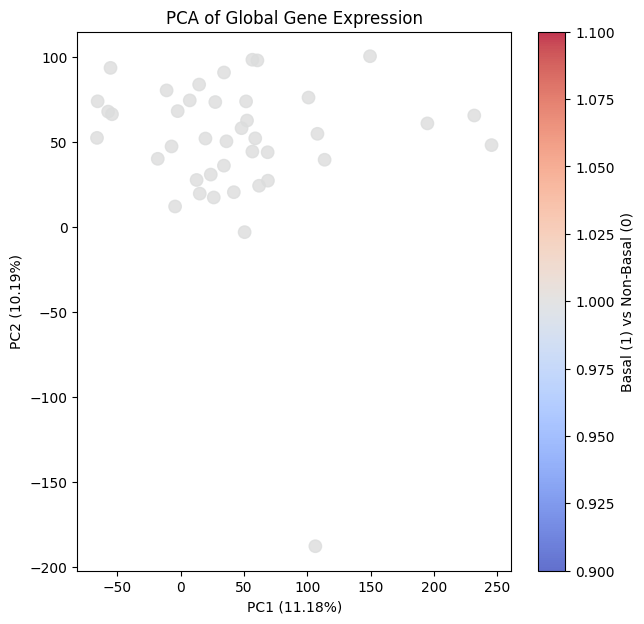

In [7]:
plt.figure(figsize=(7,7))


pca_df['Basal_Status'] = pca_df['Subtype'].map({'basal': 1, 'non-basal': 0})

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Basal_Status"],
    cmap="coolwarm",
    s=80,
    alpha=0.8
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.colorbar(label="Basal (1) vs Non-Basal (0)")
plt.title("PCA of Global Gene Expression")
plt.show()

(-0.1, 0.1)

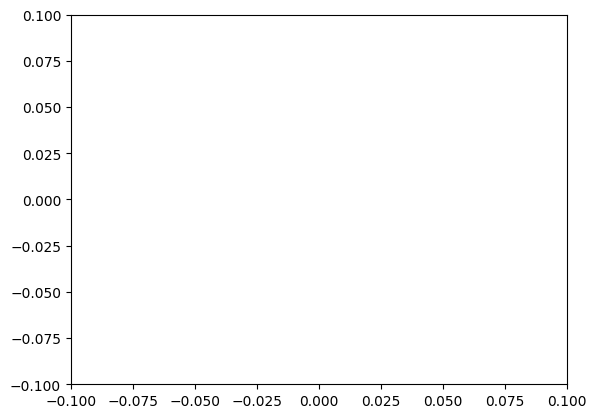

In [8]:
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)


In [9]:
pca_df[["PC1","PC2"]].head(10)


,PC1,PC2
0,-99.952222,-97.843696
1,-115.598326,-50.104867
2,-71.105811,-132.759507
3,-104.044899,-48.367470
4,-119.063994,-49.088821
5,-78.695445,-51.332723
6,-95.979328,-62.517096
7,-130.335375,-36.320169
8,-151.292708,-38.722641
9,-122.775464,-55.680685


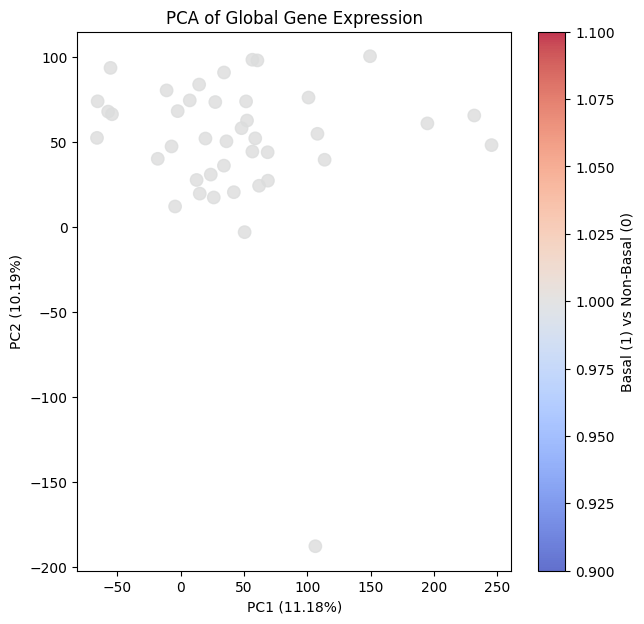

In [10]:
plt.figure(figsize=(7,7))


pca_df['Basal_Status'] = pca_df['Subtype'].map({'basal': 1, 'non-basal': 0})

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Basal_Status"],
    cmap="coolwarm",
    s=80,
    alpha=0.8
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.colorbar(label="Basal (1) vs Non-Basal (0)")
plt.title("PCA of Global Gene Expression")
plt.show()

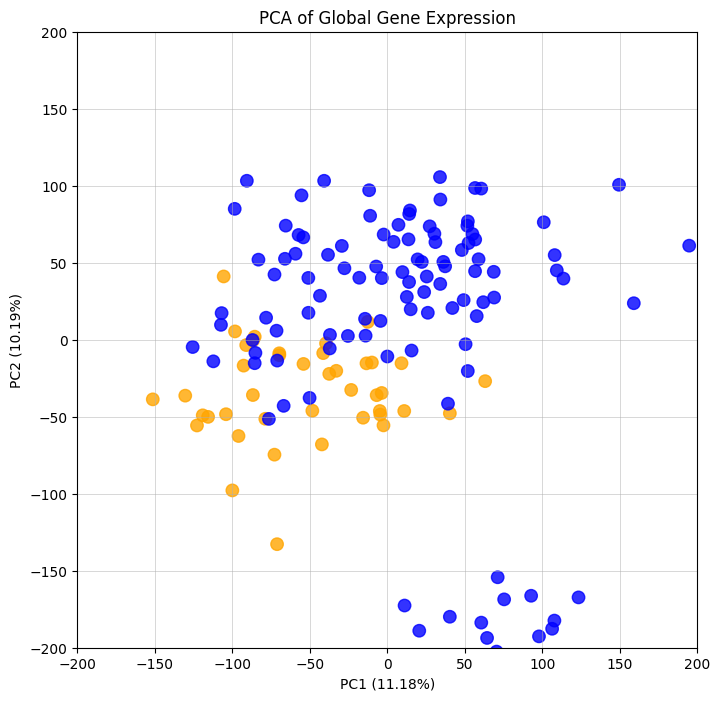

In [11]:

pca_df["Subtype"] = labels.values


pca_df['Basal_Status'] = pca_df['Subtype'].apply(lambda x: 1 if x == 'basal' else 0)

plt.figure(figsize=(8,8))

plt.xlim(-200, 200)
plt.ylim(-200, 200)

colors = pca_df['Basal_Status'].map({0: "blue", 1: "orange"})

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=colors,
    s=80,
    alpha=0.8
)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("PCA of Global Gene Expression")
plt.grid(True, linewidth=0.5, alpha=0.7)
plt.show()


PCA of global gene expression shows that non-basal samples (blue) form a tight cluster, while basal samples (orange) are more spread out. There is some overlap between the two groups, indicating that while basal tumors have subtype-specific transcriptional programs, they also share similarities with non-basal tumors. The tighter clustering of non-basal samples suggests they are more transcriptionally homogeneous. PC1 and PC2 capture 11.18% and 10.19% of the variance, respectively, demonstrating that subtype explains some, but not all, of the global gene expression variation.

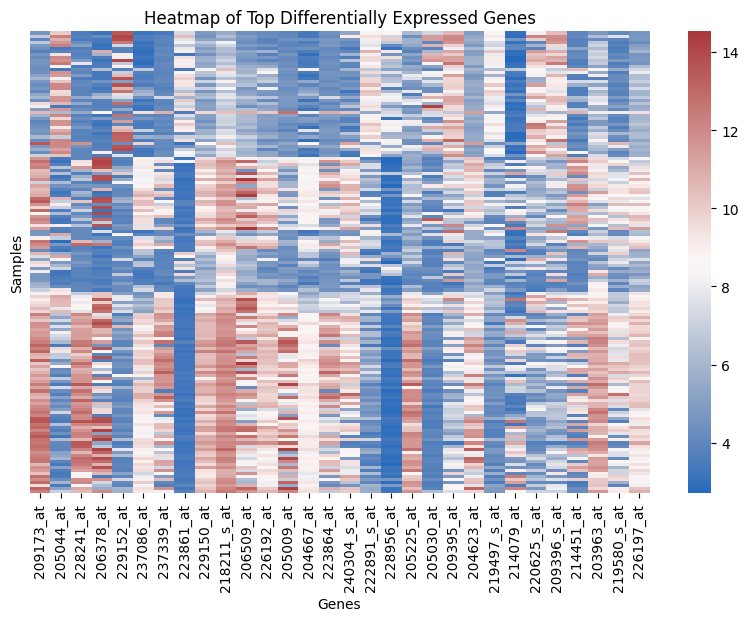

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


labels = X.loc['type']


basal_samples = X_for_scaler[labels == 'basal']
non_basal_samples = X_for_scaler[labels != 'basal']


mean_basal = basal_samples.mean(axis=0)
mean_non_basal = non_basal_samples.mean(axis=0)

abs_mean_diff = np.abs(mean_basal - mean_non_basal)


final_df = pd.DataFrame({
    'Gene': abs_mean_diff.index,
    'Abs_Mean_Diff': abs_mean_diff.values
})


top_genes = final_df.sort_values(
    'Abs_Mean_Diff', ascending=False
).head(30)['Gene']


heatmap_data = X_for_scaler[top_genes]

heatmap_data.index = df['type']


plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    cmap="vlag",
    yticklabels=False
)
plt.title("Heatmap of Top Differentially Expressed Genes")
plt.xlabel("Genes")
plt.ylabel("Samples")
plt.show()

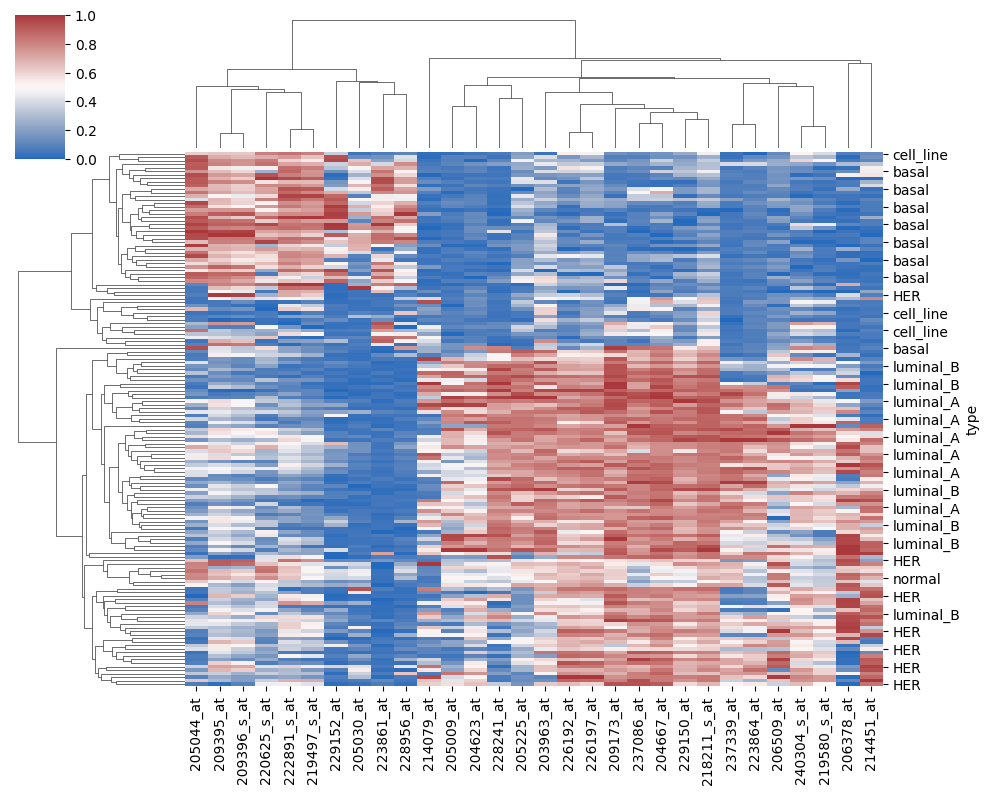

In [21]:
sns.clustermap(
    heatmap_data,
    cmap="vlag",
    figsize=(10,8),
    standard_scale=1
)
plt.show()


The heatmap shows partial natural separation based on global gene expression. Probes 205044_at to 228956_at are all highly expressed in basal samples and less expressed in non-basal samples with slight heterogeneity. Most non-basal samples exhibit the same strong gene expressions from probes 214079_at to 214451_at which are inversly expressed in Basal samples. Heterogeneity is present, as some basal samples show lower expression and some non-basal samples show higher expression.. Biologically, this shows that there is a group of genes that are constantly upregulated in basal samples and downregulated in non-basal samples. The reverse is also true (with a slightly more heterogeneity) in the non-basal associated gene block.